In [1]:
from question_generater import QuestionGenerator


In [2]:
qg = QuestionGenerator()

In [3]:
import json


for i in range(100):
    user_id = str(i)
    # output txt containing chinese
    with open ('data/selected/{}.txt'.format(user_id), 'w',encoding='utf-8') as f:
        for i in range(120):
            question = qg.get_question(user_id)
            #save to file, each question is a json, so save it in a line and can be parsed into json when read in the line
            f.write(json.dumps(question, ensure_ascii=False)+"\n")

In [4]:
# read in the 100 question files from selected directory
import os
import json

all_question_list = []

for filename in os.listdir("data/selected/"):
    if filename.endswith(".txt"):
        with open("data/selected/" + filename, "r") as f:
            for line in f:
                all_question_list.append(json.loads(line))
print(len(all_question_list))

12000


In [5]:
# read in tagged file
import pandas as pd
df = pd.read_csv("src/instances_Inception_with_tag_600.csv")

example expression number: 598
instance expression number: 600


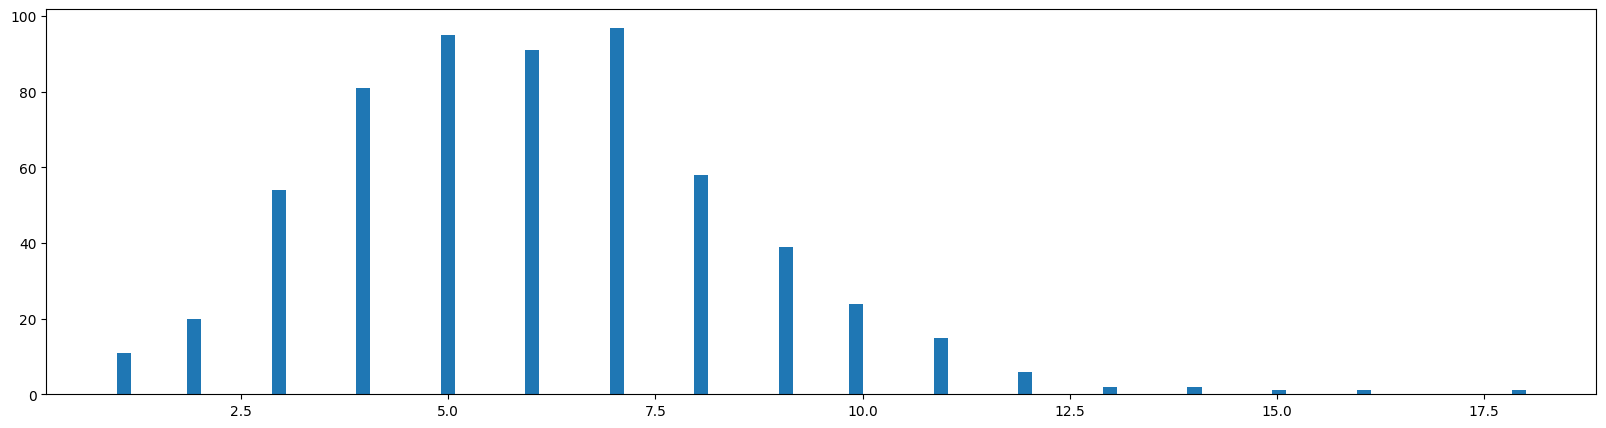

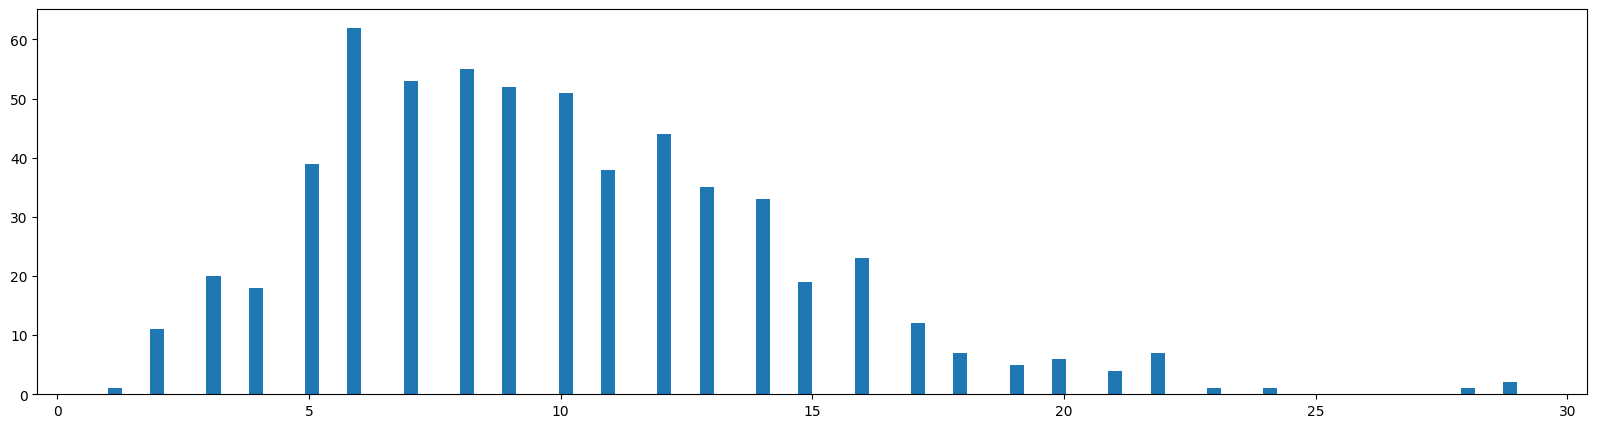

In [6]:
# statistics on the appearance time of each expression in the all quesion list
example_times = {}
instance_times = {}
for question in all_question_list:
    if question["type"] == "1v1":
        example_instance = question["example_instance"]
        if example_instance not in example_times:
            example_times[example_instance] = 0
        example_times[example_instance] += 1
    elif question["type"] == "1":
        instance = question["instance"]
        if instance not in instance_times:
            instance_times[instance] = 0
        instance_times[instance] += 1
    elif question["type"]!="finished":
        pass
        '''
        example_instances = question["example_instances"]
        for example_instance in example_instances:
            if example_instance not in example_times:
                example_times[example_instance] = 0
            example_times[example_instance] += 1
        '''

print(f"example expression number: {len(example_times)}")
print(f"instance expression number: {len(instance_times)}")

import matplotlib.pyplot as plt
# use a histogram to show the distribution of the appearance time of each expression
plt.figure(figsize=(20, 5))
plt.hist(list(example_times.values()), bins=100)
plt.show()
plt.figure(figsize=(20, 5))
plt.hist(list(instance_times.values()), bins=100)
plt.show()
